In [115]:
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mplsoccer import Pitch, Sbopen
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)

In [116]:
competitionId = 9 # Bundesliga
seasonId = 27 # 2015/2016

matches = sb.matches(competition_id = competitionId, season_id = seasonId)
match_ids = matches['match_id'].tolist()
print(match_ids)
print(len(match_ids))

[3890561, 3890505, 3890511, 3890515, 3890411, 3890397, 3890401, 3890396, 3890384, 3890385, 3890282, 3890287, 3890269, 3890268, 3890402, 3890564, 3890563, 3890562, 3890560, 3890559, 3890558, 3890557, 3890556, 3890555, 3890554, 3890553, 3890552, 3890551, 3890550, 3890549, 3890548, 3890547, 3890546, 3890545, 3890544, 3890543, 3890542, 3890541, 3890540, 3890539, 3890538, 3890537, 3890536, 3890535, 3890534, 3890533, 3890532, 3890531, 3890530, 3890529, 3890528, 3890527, 3890526, 3890525, 3890524, 3890523, 3890522, 3890521, 3890520, 3890519, 3890518, 3890517, 3890516, 3890514, 3890513, 3890512, 3890510, 3890509, 3890508, 3890507, 3890506, 3890504, 3890503, 3890502, 3890501, 3890500, 3890499, 3890498, 3890497, 3890496, 3890495, 3890494, 3890493, 3890492, 3890491, 3890490, 3890489, 3890488, 3890487, 3890486, 3890485, 3890484, 3890483, 3890482, 3890481, 3890480, 3890479, 3890478, 3890477, 3890476, 3890475, 3890474, 3890473, 3890472, 3890471, 3890470, 3890469, 3890468, 3890467, 3890466, 3890465, 

In [117]:
parser = Sbopen()
matchId = 3878545
df, related, freeze, tactics = parser.event(matchId)

df.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_won_penalty,pass_goal_assist,pass_deflected,pass_cut_back,shot_one_on_one,substitution_replacement_id,substitution_replacement_name,shot_open_goal,dribble_nutmeg,dribble_no_touch
0,f511e6e3-1796-47ec-9f80-1302014be568,1,1,00:00:00,0,0,1,0.000000,3878545,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2246bfa6-2b57-4b03-8689-0644ea059dfe,2,1,00:00:00,0,0,1,0.000000,3878545,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,79b14a27-5ba5-47c5-8dba-8535c0c7e89e,3,1,00:00:00,0,0,1,0.000000,3878545,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b25111cc-844f-4a1f-bcfb-ef7d88eb6355,4,1,00:00:00,0,0,1,0.000000,3878545,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,626af2dd-3f36-4f9c-bff5-355773cceed9,5,1,00:00:00.060000,0,0,2,0.452496,3878545,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
teams = df['team_name'].unique()

team1 = df[df['team_name'] == teams[0]]
team2 = df[df['team_name'] == teams[1]]

passesTeam1 = team1[team1['type_name'] == 'Pass']
passesTeam2 = team2[team2['type_name'] == 'Pass']

In [119]:
passesTeam1 = passesTeam1[['id','minute','player_id','player_name','x','y','end_x', 'end_y','pass_recipient_id','pass_recipient_name','outcome_id','outcome_name']]
passesTeam2 = passesTeam2[['id','minute','player_id','player_name','x','y','end_x', 'end_y','pass_recipient_id','pass_recipient_name','outcome_id','outcome_name']]

passesTeam1.head()

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
4,626af2dd-3f36-4f9c-bff5-355773cceed9,0,6759.0,Roberto Soriano,61.0,40.1,60.0,42.2,7000.0,Eder Citadin Martins,NaN,NaN
6,ae34a71f-950f-4a4e-b662-e94a40bbefef,0,7000.0,Eder Citadin Martins,60.0,42.2,53.5,40.9,16586.0,Fernando Lucas Martins,NaN,NaN
9,41f851f7-f436-4d62-919c-42af675913b4,0,16586.0,Fernando Lucas Martins,53.9,40.2,49.6,8.6,7012.0,Vasco Regini,NaN,NaN
12,acc299aa-3392-4e2f-8c62-342c813a4592,0,7012.0,Vasco Regini,49.6,8.6,36.8,21.1,40321.0,Andrea Coda,NaN,NaN
14,6a1f7437-d713-452e-8c0d-65229e413593,0,40321.0,Andrea Coda,36.8,21.1,80.7,24.8,7000.0,Eder Citadin Martins,9.0,Incomplete


In [120]:
successfulPassesTeam1 = passesTeam1[passesTeam1['outcome_name'].isnull()]
successfulPassesTeam2 = passesTeam2[passesTeam2['outcome_name'].isnull()]

successfulPassesTeam1.head()

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
4,626af2dd-3f36-4f9c-bff5-355773cceed9,0,6759.0,Roberto Soriano,61.0,40.1,60.0,42.2,7000.0,Eder Citadin Martins,NaN,NaN
6,ae34a71f-950f-4a4e-b662-e94a40bbefef,0,7000.0,Eder Citadin Martins,60.0,42.2,53.5,40.9,16586.0,Fernando Lucas Martins,NaN,NaN
9,41f851f7-f436-4d62-919c-42af675913b4,0,16586.0,Fernando Lucas Martins,53.9,40.2,49.6,8.6,7012.0,Vasco Regini,NaN,NaN
12,acc299aa-3392-4e2f-8c62-342c813a4592,0,7012.0,Vasco Regini,49.6,8.6,36.8,21.1,40321.0,Andrea Coda,NaN,NaN
20,e39b3337-8489-45a2-a437-dc486b0f1f16,0,36364.0,Dávid Ivan,62.7,36.6,56.8,34.9,16586.0,Fernando Lucas Martins,NaN,NaN


In [121]:
subsTeam1 = team1[team1['type_name'] == 'Substitution']
subsTeam2 = team2[team2['type_name'] == 'Substitution']

firstSubTeam1 = subsTeam1['minute'].min() if not subsTeam1.empty else 150
firstSubTeam2 = subsTeam2['minute'].min() if not subsTeam2.empty else 150

print(firstSubTeam1, firstSubTeam2)

74 55


In [122]:
successfulPassesTeam1 = successfulPassesTeam1[successfulPassesTeam1['minute'] < firstSubTeam1]
successfulPassesTeam2 = successfulPassesTeam2[successfulPassesTeam2['minute'] < firstSubTeam2]

successfulPassesTeam1.head()  

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
4,626af2dd-3f36-4f9c-bff5-355773cceed9,0,6759.0,Roberto Soriano,61.0,40.1,60.0,42.2,7000.0,Eder Citadin Martins,NaN,NaN
6,ae34a71f-950f-4a4e-b662-e94a40bbefef,0,7000.0,Eder Citadin Martins,60.0,42.2,53.5,40.9,16586.0,Fernando Lucas Martins,NaN,NaN
9,41f851f7-f436-4d62-919c-42af675913b4,0,16586.0,Fernando Lucas Martins,53.9,40.2,49.6,8.6,7012.0,Vasco Regini,NaN,NaN
12,acc299aa-3392-4e2f-8c62-342c813a4592,0,7012.0,Vasco Regini,49.6,8.6,36.8,21.1,40321.0,Andrea Coda,NaN,NaN
20,e39b3337-8489-45a2-a437-dc486b0f1f16,0,36364.0,Dávid Ivan,62.7,36.6,56.8,34.9,16586.0,Fernando Lucas Martins,NaN,NaN


In [123]:
averagePosTeam1 = successfulPassesTeam1.groupby('player_name').agg({'x':'mean', 'y':['mean', 'count'] }).reset_index()
averagePosTeam2 = successfulPassesTeam2.groupby('player_name').agg({'x':'mean', 'y':['mean', 'count']}).reset_index()

averagePosTeam1.columns = ['player_name', 'x', 'y', 'count']
averagePosTeam2.columns = ['player_name', 'x', 'y', 'count']

averagePosTeam1.head()

,player_name,x,y,count
0,Andrea Coda,35.751020,27.146939,49
1,Dávid Ivan,62.731250,57.400000,32
2,Eder Citadin Martins,67.222727,31.622727,22
3,Emiliano Viviano,10.557143,39.535714,14
4,Fernando Lucas Martins,52.659701,42.785075,67


In [124]:
passesToTeam1 = successfulPassesTeam1.groupby(['player_name','pass_recipient_name']).id.count().reset_index()
passesToTeam1.rename(columns={'id':'pass_count'},inplace=True)

passesToTeam2 = successfulPassesTeam2.groupby(['player_name','pass_recipient_name']).id.count().reset_index()
passesToTeam2.rename(columns={'id':'pass_count'},inplace=True)

passesToTeam1.head()

,player_name,pass_recipient_name,pass_count
0,Andrea Coda,Eder Citadin Martins,2
1,Andrea Coda,Emiliano Viviano,5
2,Andrea Coda,Fernando Lucas Martins,6
3,Andrea Coda,Mattia Cassani,4
4,Andrea Coda,Matías Agustín Silvestre,4


In [125]:
passesToTeam1['sorted_pair'] = passesToTeam1.apply(
    lambda row: tuple(sorted([row['player_name'], row['pass_recipient_name']])),
    axis=1
)

grouped = passesToTeam1.groupby('sorted_pair', as_index=False)['pass_count'].sum()
grouped[['player_a', 'player_b']] = pd.DataFrame(grouped['sorted_pair'].tolist(), index=grouped.index)
passesBetweenTeam1 = grouped[['player_a', 'player_b', 'pass_count']]
passesBetweenTeam1 = passesBetweenTeam1.sort_values(by=['player_a', 'player_b']).reset_index(drop=True)

passesToTeam2['sorted_pair'] = passesToTeam2.apply(
    lambda row: tuple(sorted([row['player_name'], row['pass_recipient_name']])),
    axis=1
)

grouped = passesToTeam2.groupby('sorted_pair', as_index=False)['pass_count'].sum()
grouped[['player_a', 'player_b']] = pd.DataFrame(grouped['sorted_pair'].tolist(), index=grouped.index)
passesBetweenTeam2 = grouped[['player_a', 'player_b', 'pass_count']]
passesBetweenTeam2 = passesBetweenTeam2.sort_values(by=['player_a', 'player_b']).reset_index(drop=True)

passesBetweenTeam1.head()

,player_a,player_b,pass_count
0,Andrea Coda,Dávid Ivan,2
1,Andrea Coda,Eder Citadin Martins,2
2,Andrea Coda,Emiliano Viviano,7
3,Andrea Coda,Fernando Lucas Martins,16
4,Andrea Coda,Mattia Cassani,9


In [126]:
passesBetweenTeam1 = pd.merge(passesBetweenTeam1, averagePosTeam1, left_on='player_a', right_on='player_name')
passesBetweenTeam2 = pd.merge(passesBetweenTeam2, averagePosTeam2, left_on='player_a', right_on='player_name')

passesBetweenTeam1.head()

,player_a,player_b,pass_count,player_name,x,y,count
0,Andrea Coda,Dávid Ivan,2,Andrea Coda,35.75102,27.146939,49
1,Andrea Coda,Eder Citadin Martins,2,Andrea Coda,35.75102,27.146939,49
2,Andrea Coda,Emiliano Viviano,7,Andrea Coda,35.75102,27.146939,49
3,Andrea Coda,Fernando Lucas Martins,16,Andrea Coda,35.75102,27.146939,49
4,Andrea Coda,Mattia Cassani,9,Andrea Coda,35.75102,27.146939,49


In [127]:
passesBetweenTeam1 = pd.merge(passesBetweenTeam1, averagePosTeam1, left_on='player_b', right_on='player_name', suffixes=('', '_end'))
passesBetweenTeam2 = pd.merge(passesBetweenTeam2, averagePosTeam2, left_on='player_b', right_on='player_name', suffixes=('', '_end'))

passesBetweenTeam1.head()

,player_a,player_b,pass_count,player_name,x,y,count,player_name_end,x_end,y_end,count_end
0,Andrea Coda,Dávid Ivan,2,Andrea Coda,35.75102,27.146939,49,Dávid Ivan,62.731250,57.400000,32
1,Andrea Coda,Eder Citadin Martins,2,Andrea Coda,35.75102,27.146939,49,Eder Citadin Martins,67.222727,31.622727,22
2,Andrea Coda,Emiliano Viviano,7,Andrea Coda,35.75102,27.146939,49,Emiliano Viviano,10.557143,39.535714,14
3,Andrea Coda,Fernando Lucas Martins,16,Andrea Coda,35.75102,27.146939,49,Fernando Lucas Martins,52.659701,42.785075,67
4,Andrea Coda,Mattia Cassani,9,Andrea Coda,35.75102,27.146939,49,Mattia Cassani,49.998039,68.427451,51


In [128]:
passesBetweenTeam1 = passesBetweenTeam1[['player_a', 'x', 'y', 'count', 'player_b', 'x_end', 'y_end', 'count_end', 'pass_count']]
passesBetweenTeam2 = passesBetweenTeam2[['player_a', 'x', 'y', 'count', 'player_b', 'x_end', 'y_end', 'count_end', 'pass_count']]

passesBetweenTeam1.head()

,player_a,x,y,count,player_b,x_end,y_end,count_end,pass_count
0,Andrea Coda,35.75102,27.146939,49,Dávid Ivan,62.731250,57.400000,32,2
1,Andrea Coda,35.75102,27.146939,49,Eder Citadin Martins,67.222727,31.622727,22,2
2,Andrea Coda,35.75102,27.146939,49,Emiliano Viviano,10.557143,39.535714,14,7
3,Andrea Coda,35.75102,27.146939,49,Fernando Lucas Martins,52.659701,42.785075,67,16
4,Andrea Coda,35.75102,27.146939,49,Mattia Cassani,49.998039,68.427451,51,9


In [129]:
lineup = parser.lineup(matchId)
team1Lineup = lineup[lineup['team_name'] == teams[0]]
team2Lineup = lineup[lineup['team_name'] == teams[1]]

team1Lineup = team1Lineup[['player_name', 'player_nickname']]
team2Lineup = team2Lineup[['player_name', 'player_nickname']]

team1Lineup.head()

,player_name,player_nickname
21,Luis Fernando Muriel Fruto,Luis Muriel
22,Roberto Soriano,Roberto Soriano
23,Eder Citadin Martins,Éder
24,Édgar Osvaldo Barreto Cáceres,Édgar Barreto
25,Vasco Regini,Vasco Regini


In [130]:
averagePosTeam1 = pd.merge(averagePosTeam1, team1Lineup, on='player_name', how='left')
averagePosTeam2 = pd.merge(averagePosTeam2, team2Lineup, on='player_name', how='left')

averagePosTeam1.head()

,player_name,x,y,count,player_nickname
0,Andrea Coda,35.751020,27.146939,49,Andrea Coda
1,Dávid Ivan,62.731250,57.400000,32,Dávid Ivan
2,Eder Citadin Martins,67.222727,31.622727,22,Éder
3,Emiliano Viviano,10.557143,39.535714,14,Emiliano Viviano
4,Fernando Lucas Martins,52.659701,42.785075,67,Fernando


In [131]:
goals = df[df['type_name'] == 'Shot']
goals = goals[goals['outcome_name'] == 'Goal']
goals = goals[['minute', 'team_name']]

team1Goals = goals[goals['team_name'] == teams[0]]
team2Goals = goals[goals['team_name'] == teams[1]]

team1Goals = team1Goals[team1Goals['minute'] < firstSubTeam1]
team2Goals = team2Goals[team2Goals['minute'] < firstSubTeam2]

team1Goals = len(team1Goals)
team2Goals = len(team2Goals)

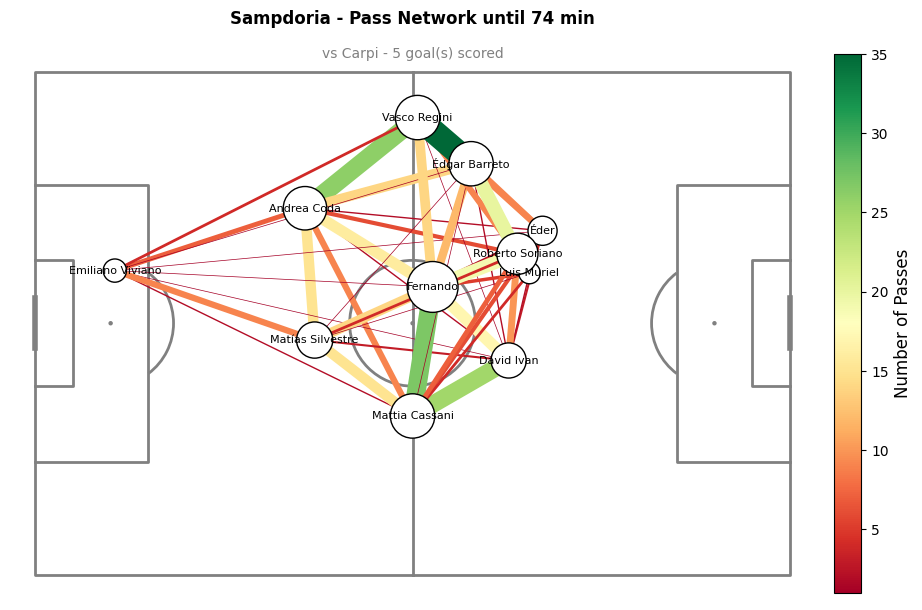

In [132]:
pass_between = passesBetweenTeam1
average_locations = averagePosTeam1
norm = colors.Normalize(vmin=pass_between['pass_count'].min(), vmax=pass_between['pass_count'].max())
cmap = cm.RdYlGn
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)
pass_colors = scalar_map.to_rgba(pass_between['pass_count'])

pitch = Pitch(pitch_color='white', line_color='gray')
fig, ax = pitch.draw(figsize=(10, 8))

pitch.lines(
    1.2 * pass_between['x'], 
    0.8 * pass_between['y'],
    1.2 * pass_between['x_end'], 
    0.8 * pass_between['y_end'],
    lw=pass_between['pass_count'] * 0.5,
    color=pass_colors,
    zorder=1,
    ax=ax
)

scalar_map.set_array(pass_between['pass_count'])
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('Number of Passes', fontsize=12)

nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y,s=20*average_locations['count'].values,color='white',edgecolors='black',linewidth=1,ax=ax)

for index,row in average_locations.iterrows():
    pitch.annotate(row['player_nickname'], xy=(1.2*row["x"],0.8*row["y"]), c='black', va='center', ha='center', size=8, ax=ax)

title = team1[team1['team_name'] == teams[0]]['team_name'].values[0] + ' - Pass Network until '  + str(firstSubTeam1) + ' min'
    
ax.set_title(title,va='center',ha='center',fontsize=12,fontweight='bold',pad=20)

subtitle = 'vs ' + team2[team2['team_name'] == teams[1]]['team_name'].values[0] + ' - ' + str(team1Goals) + ' goal(s) scored'

ax.annotate(subtitle, xy=(0.5, 1), xytext=(0, 0),
             xycoords='axes fraction', textcoords='offset points',
             fontsize=10, color='gray', va='top', ha='center')


plt.tight_layout()
plt.show()

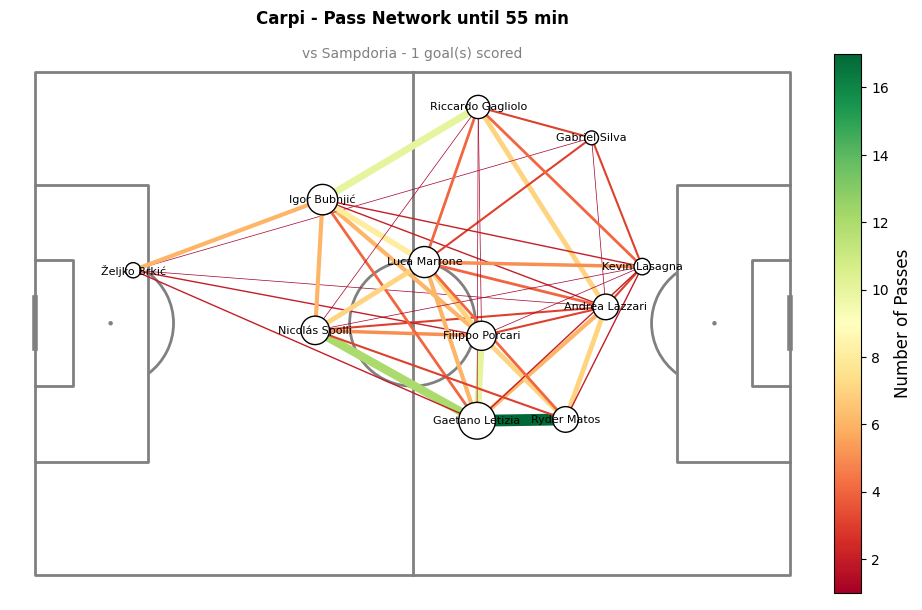

In [133]:
pass_between = passesBetweenTeam2
average_locations = averagePosTeam2
norm = colors.Normalize(vmin=pass_between['pass_count'].min(), vmax=pass_between['pass_count'].max())
cmap = cm.RdYlGn
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)
pass_colors = scalar_map.to_rgba(pass_between['pass_count'])

pitch = Pitch(pitch_color='white', line_color='gray')
fig, ax = pitch.draw(figsize=(10, 8))

pitch.lines(
    1.2 * pass_between['x'], 
    0.8 * pass_between['y'],
    1.2 * pass_between['x_end'], 
    0.8 * pass_between['y_end'],
    lw=pass_between['pass_count'] * 0.5,
    color=pass_colors,
    zorder=1,
    ax=ax
)

scalar_map.set_array(pass_between['pass_count'])
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('Number of Passes', fontsize=12)

nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y,s=20*average_locations['count'].values,color='white',edgecolors='black',linewidth=1,ax=ax)

for index,row in average_locations.iterrows():
    pitch.annotate(row['player_nickname'], xy=(1.2*row["x"],0.8*row["y"]), c='black', va='center', ha='center', size=8, ax=ax)

title = team2[team2['team_name'] == teams[1]]['team_name'].values[0] + ' - Pass Network until '  + str(firstSubTeam2) + ' min'
    
ax.set_title(title,va='center',ha='center',fontsize=12,fontweight='bold',pad=20)

subtitle = 'vs ' + team1[team1['team_name'] == teams[0]]['team_name'].values[0] + ' - ' + str(team2Goals) + ' goal(s) scored'

ax.annotate(subtitle, xy=(0.5, 1), xytext=(0, 0),
             xycoords='axes fraction', textcoords='offset points',
             fontsize=10, color='gray', va='top', ha='center')


plt.tight_layout()
plt.show()